In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv("C:/Users/trici/Documents/Datasets/Mall_Customers.csv")

In [36]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploring Gender and Correlations with Other Variables

In [37]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [38]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [39]:
gender_counts = df['Gender'].value_counts()

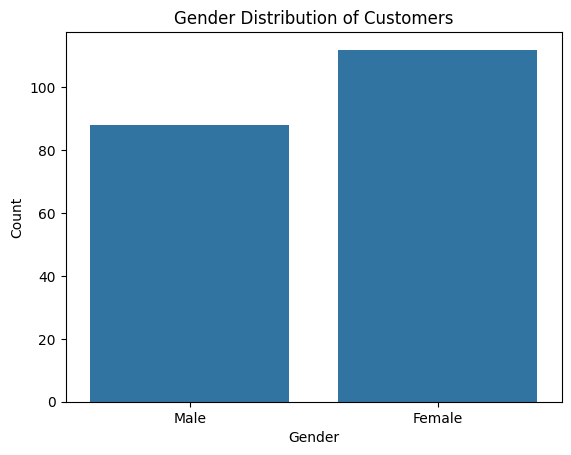

In [40]:
sns.countplot(x='Gender', data=df);
plt.title("Gender Distribution of Customers", fontsize=12);
plt.xlabel("Gender", fontsize=10);
plt.ylabel("Count", fontsize=10);

In [41]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

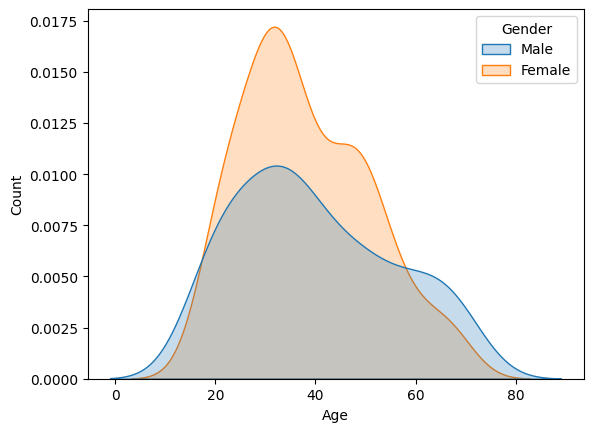

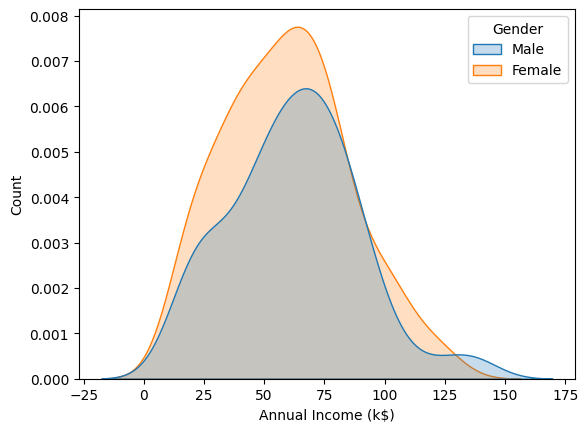

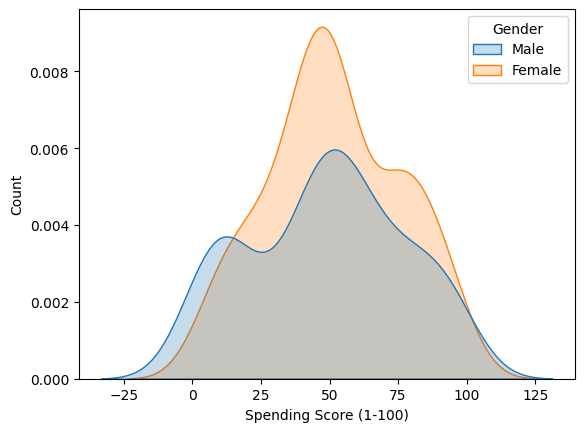

In [42]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.kdeplot(x=df[i],shade=True,hue=df['Gender']);
    plt.ylabel("Count");

In [43]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Bivariate Analysis

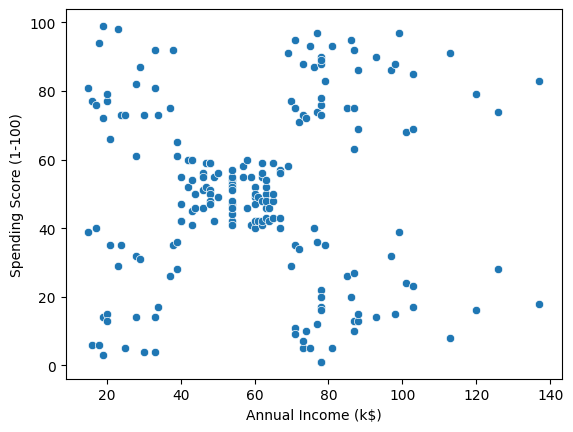

In [44]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' );

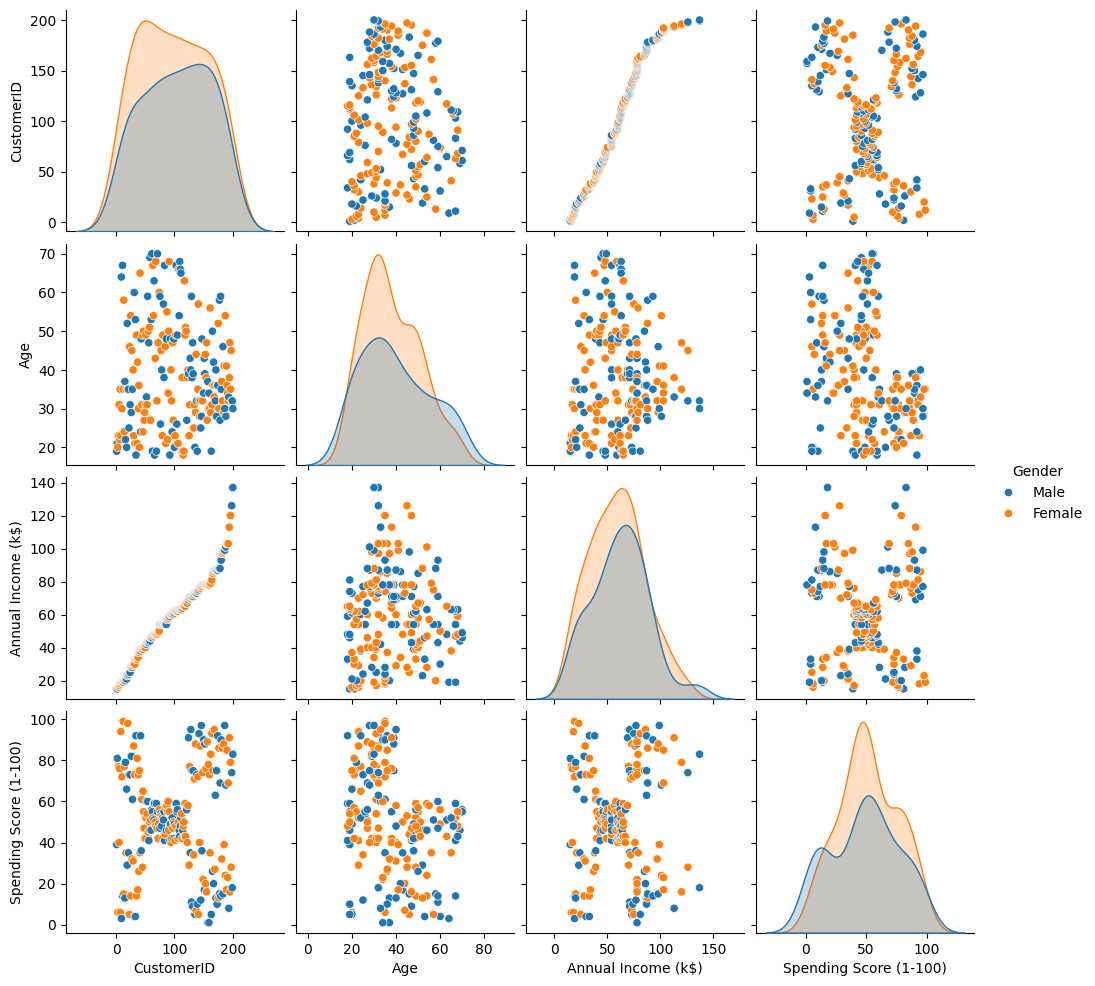

In [45]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender');

In [46]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [47]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


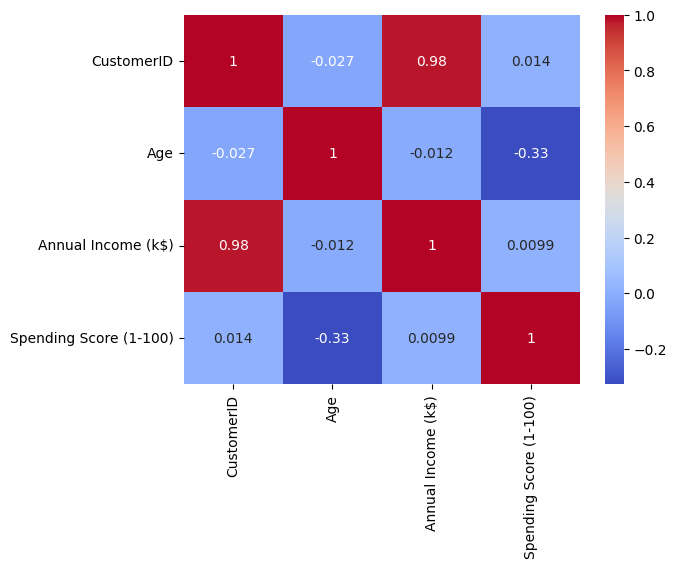

In [48]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm');

## Clustering - Univariate, Bivariate, Multivariate

In [49]:
clustering1 = KMeans(n_clusters=3)

In [50]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [51]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [52]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [53]:
df['Income Cluster'].value_counts()

Income Cluster
0    86
1    58
2    56
Name: count, dtype: int64

In [54]:
clustering1.inertia_

25640.457784396836

In [55]:
inertia_scores=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [56]:
inertia_scores

[137277.28000000003,
 48660.88888888888,
 24361.259213759207,
 13556.829274891776,
 9407.908188585607,
 5081.484660267269,
 4471.581784511785,
 2931.980158730159,
 2523.7735930735935,
 2088.6123321123323]

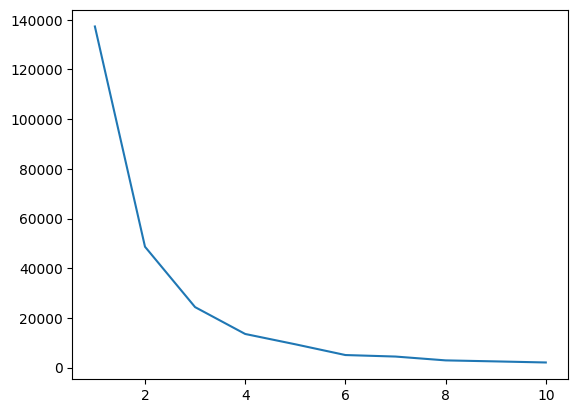

In [57]:
plt.plot(range(1,11),inertia_scores)

In [58]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,41.279070,60.906977,50.337209
1,37.120690,29.551724,49.689655
2,36.910714,92.142857,50.517857


In [59]:
#Bivariate Clustering
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,3


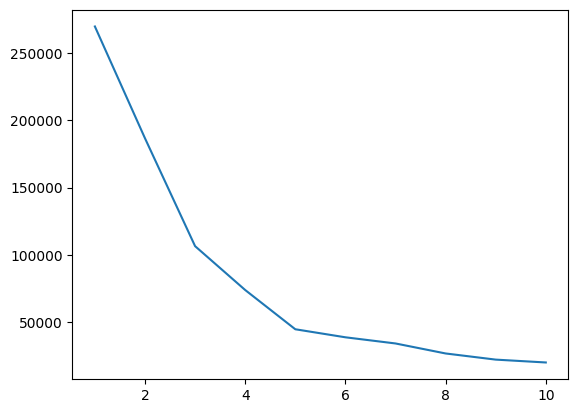

In [60]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

plt.plot(range(1,11),inertia_scores2)

In [61]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

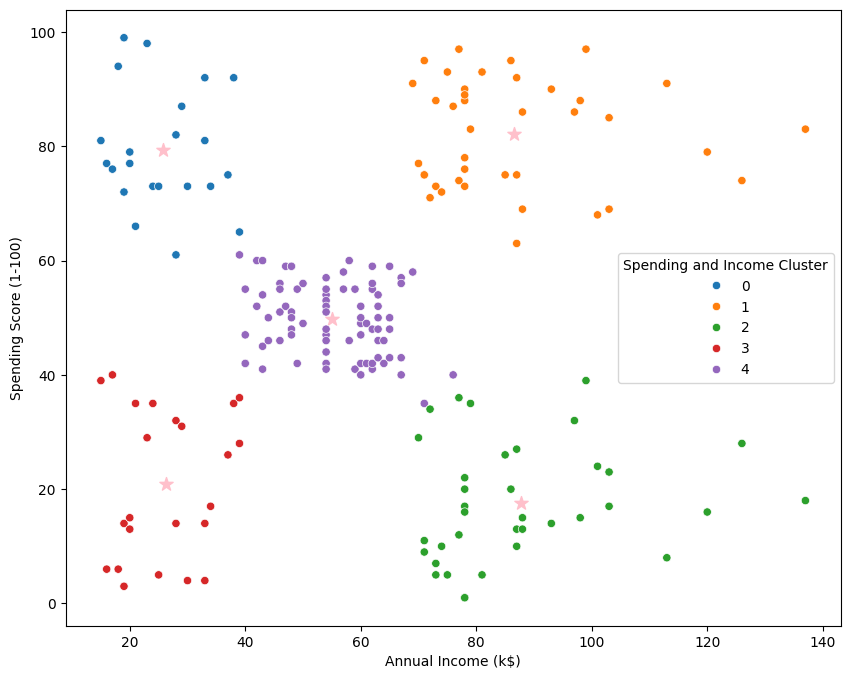

In [62]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'],s=100,c='pink',marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10');

In [63]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'])

Gender,Female,Male
Spending and Income Cluster,,
0,13,9
1,21,18
2,17,19
3,14,9
4,47,33


Income to Spending Ratio

In [64]:
df['Income_to_Spending_Ratio'] = df['Annual Income (k$)'] / df['Spending Score (1-100)']

In [65]:
df['Income_to_Spending_Ratio']

0      0.384615
1      0.185185
2      2.666667
3      0.207792
4      0.425000
         ...   
195    1.518987
196    4.500000
197    1.702703
198    7.611111
199    1.650602
Name: Income_to_Spending_Ratio, Length: 200, dtype: float64

In [66]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 25, 50, 100], labels=['Young', 'Middle-aged', 'Senior'])

In [67]:
df['Age Group']

0            Young
1            Young
2            Young
3            Young
4      Middle-aged
          ...     
195    Middle-aged
196    Middle-aged
197    Middle-aged
198    Middle-aged
199    Middle-aged
Name: Age Group, Length: 200, dtype: category
Categories (3, object): ['Young' < 'Middle-aged' < 'Senior']

Exploring Relationships Between Age, Income, and Spending

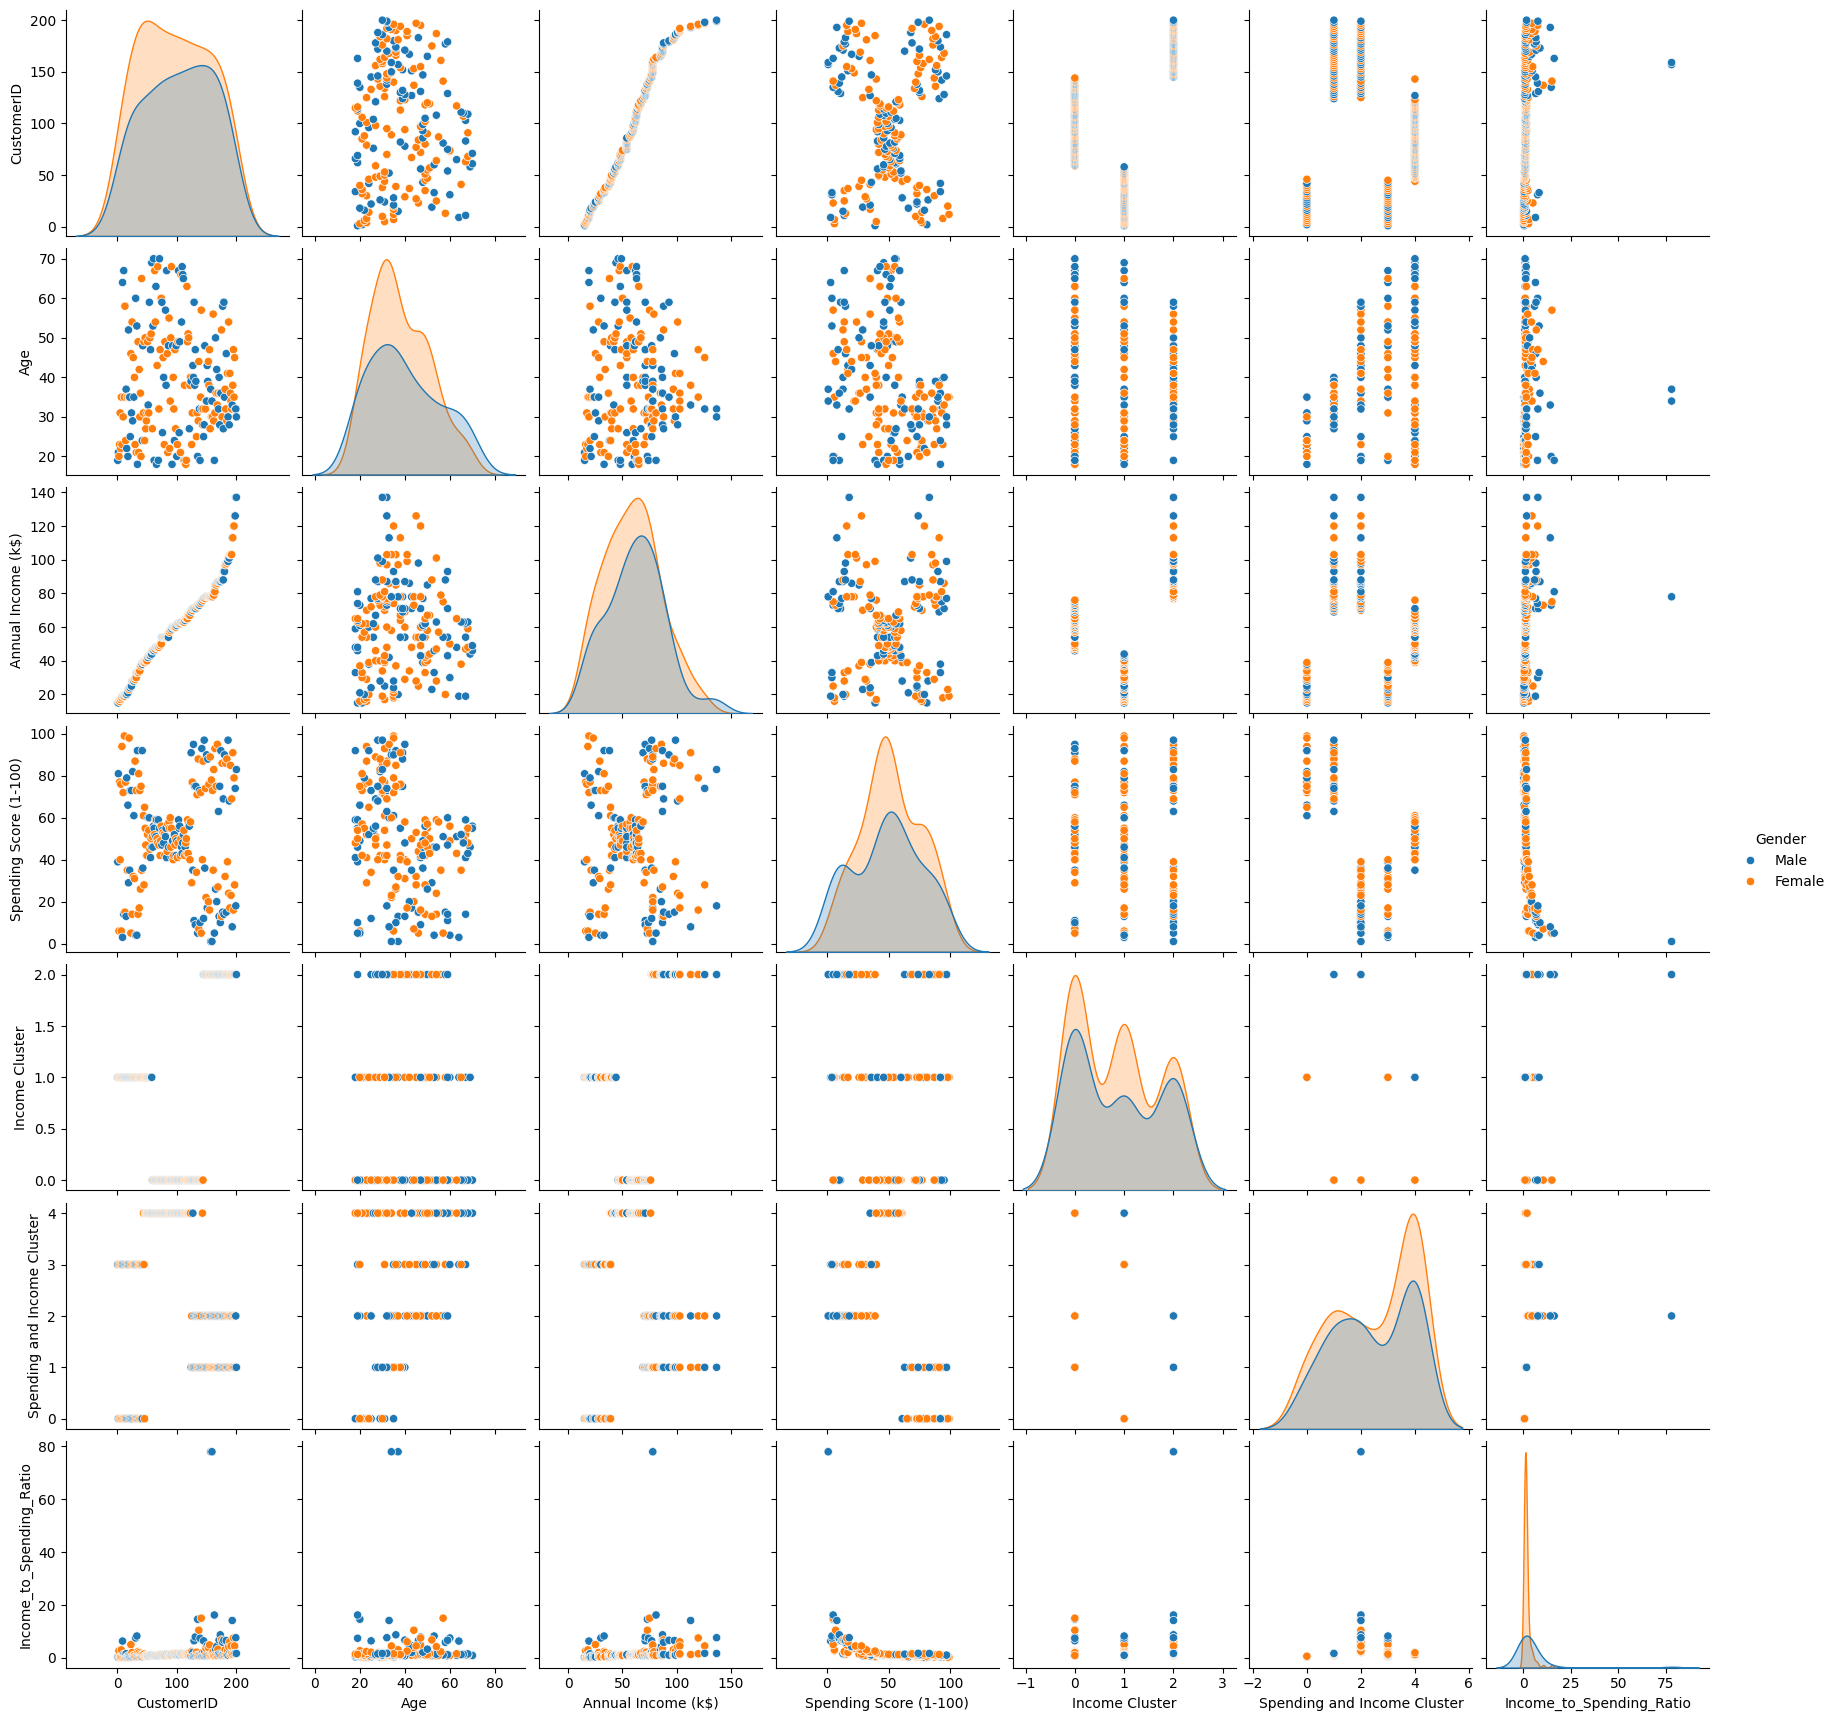

In [69]:
sns.pairplot(df, hue='Gender')

In [71]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler

In [72]:
scale = StandardScaler()

In [73]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Income_to_Spending_Ratio,Age Group
0,1,Male,19,15,39,1,3,0.384615,Young
1,2,Male,21,15,81,1,0,0.185185,Young
2,3,Female,20,16,6,1,3,2.666667,Young
3,4,Female,23,16,77,1,0,0.207792,Young
4,5,Female,31,17,40,1,3,0.425000,Middle-aged


In [74]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Income_to_Spending_Ratio,Gender_Male,Age Group_Middle-aged,Age Group_Senior
0,1,19,15,39,1,3,0.384615,True,False,False
1,2,21,15,81,1,0,0.185185,True,False,False
2,3,20,16,6,1,3,2.666667,False,False,False
3,4,23,16,77,1,0,0.207792,False,False,False
4,5,31,17,40,1,3,0.425000,False,True,False


In [75]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster',
       'Income_to_Spending_Ratio', 'Gender_Male', 'Age Group_Middle-aged',
       'Age Group_Senior'],
      dtype='object')

In [76]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [77]:
dff = scale.fit_transform(dff)

In [78]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


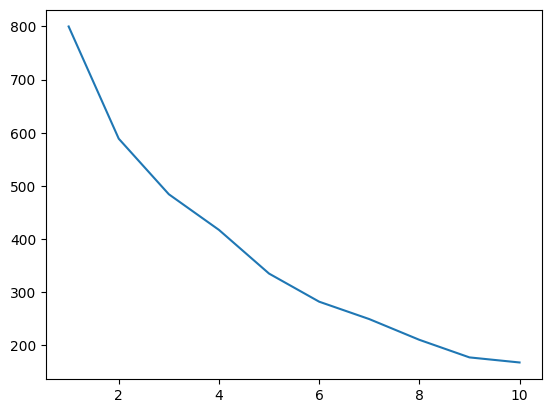

In [79]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [80]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Income_to_Spending_Ratio,Age Group
0,1,Male,19,15,39,1,3,0.384615,Young
1,2,Male,21,15,81,1,0,0.185185,Young
2,3,Female,20,16,6,1,3,2.666667,Young
3,4,Female,23,16,77,1,0,0.207792,Young
4,5,Female,31,17,40,1,3,0.425000,Middle-aged
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,1,1.518987,Middle-aged
196,197,Female,45,126,28,2,2,4.500000,Middle-aged
197,198,Male,32,126,74,2,1,1.702703,Middle-aged
198,199,Male,32,137,18,2,2,7.611111,Middle-aged


In [81]:
df.to_csv('Clustering.csv')